In [1]:
from matplotlib import pyplot
import numpy as np
import json
import cv2 as cv
import os
from PIL import Image

In [20]:
num = 1
datapath = os.path.join('resultimage','0-heat' + str(num) + '.jpg')
a = cv.imread(datapath, 0)

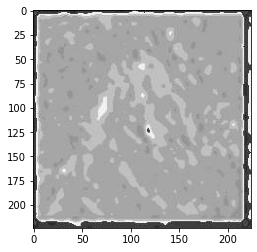

In [21]:
pyplot.imshow(a, cmap='gray')

resultimage/1-heat1.jpg
resultimage/1-heat2.jpg
resultimage/1-heat3.jpg
resultimage/1-heat4.jpg


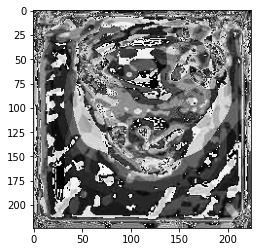

In [29]:
addedImage = np.ones_like(a)
for idx in range(1, 5):
    datapath = os.path.join('resultimage','1-heat' + str(idx) + '.jpg')
    print(datapath)
    tmp = cv.imread(datapath, 0)
    addedImage += tmp*(5-idx)
addedImage = (addedImage - addedImage.min())/addedImage.max() * 255

pyplot.imshow(addedImage, cmap='gray')

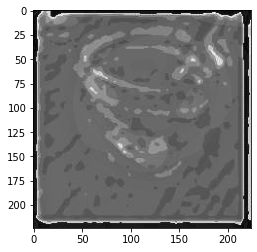

In [89]:
addedImage = np.zeros_like(a, dtype=np.uint16)
heatlist = []
for idx in range(1, 5):
    datapath = os.path.join('resultimage','1-heat' + str(idx) + '.jpg')
    tmp = cv.imread(datapath, 0)
    heatlist.append(tmp*(np.exp(-idx)))  

width, height= a.shape[0], a.shape[1]
for x in range(width):
    for y in range(height):
        tmpvector = []
        for heattmp in heatlist:
            tmpvector.append(heattmp[x, y])
        addedImage[x,y] += np.var(tmpvector)
        
addedImage = (addedImage-addedImage.min())/addedImage.max() * 255
pyplot.imshow(addedImage, 'gray')